# Working Code

## Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Getting Data

In [2]:
tracking_week_1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv")

In [3]:
play1 = tracking_week_1[(tracking_week_1.gameId == 2022091200) & (tracking_week_1.playId == 64)]

before_snap = play1[play1.frameType == "BEFORE_SNAP"]
snap = play1[play1.frameType == "SNAP"]
after_snap = play1[play1.frameType == "AFTER_SNAP"]

## Functions to get the player that has the ball

In [4]:
def ball_distance_dictionary(player_df : pd.DataFrame) -> (dict, int): 
    player_sep = {}
    players = player_df.displayName.unique()
    football = player_df[player_df.displayName == 'football'].reset_index(drop=True)
    for i in range(len(player_df.displayName.unique())):
        player = player_df[player_df.displayName == players[i]].reset_index(drop=True)
        if player.displayName[0] != "football":
            distances = list(zip(player.x, player.y))
            seps = []
            for idx, (x_dist, y_dist) in enumerate(distances):
                sep = ((football.x[idx] - x_dist)**2 + (football.y[idx] - y_dist)**2)
                seps.append(sep)
                frames = len(seps)
        player_sep[players[i]] = seps
    return player_sep, frames

def player_with_ball(player_df : pd.DataFrame) -> list:
    player_sep, frames = ball_distance_dictionary(player_df)
    player_with_ball = [None] * frames
    players = player_df.displayName.unique()
    
    for frame in range(frames):
        curr = None
        curr_dist = 17209
        for player in players:
            if player_sep[player][frame] < 1:
                curr = player
                curr_dist = player_sep[player][frame]
            if curr is not None and player_sep[player][frame] < curr_dist:
                curr = player
                curr_dist = player_sep[player][frame]
        if curr is not None:
            player_with_ball[frame] = (curr, curr_dist)
        else:
            player_with_ball[frame] = ('In air', None)

    return player_with_ball

## Making graphs of the play that label the player with the ball

In [5]:
frames = []
i = 0
ball_posessions = player_with_ball(play1)
for frame in play1.frameId.unique():
    #frames.append([plt.figure()])
    play_at_frame = play1[play1.frameId == frame].sort_values(by="jerseyNumber").reset_index(drop=True)
    players = play_at_frame[:-1]
    ball = play_at_frame[-1:] 

    plt.xlim(0, 120)
    plt.ylim(0, 53.3)
    plt.scatter(players.x, players.y, c=range(len(players)))
    plt.scatter(ball.x, ball.y, c="red", marker="*") 
    plt.title(play_at_frame.frameType[0])

    player = ball_posessions[i][0]
    if (player != "In air"): 
        player_x = list(play_at_frame[play_at_frame.displayName == player].x)[0]
        player_y = list(play_at_frame[play_at_frame.displayName == player].y)[0]
        plt.text(player_x, player_y, player)
        
    
    #frames.append(plt.gcf())
    plt.savefig(f"img{i}.png")
    plt.close()
    i += 1

In [6]:
play1.frameId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163])

### Calculating frame rate

In [7]:
play_length = (pd.to_datetime(play1.time.max()) - pd.to_datetime(play1.time.min())).total_seconds()
num_frames = len(play1.frameId.unique())
print(f"Frame rate: {num_frames / play_length}")

Frame rate: 10.06172839506173


## Create animation from PNGs

In [8]:
os.system("ffmpeg -r 10.06 -i img%01d.png -vcodec mpeg4 -y movie.mp4")

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

0

### Delete PNGs

In [9]:
#courtesy of Gemini
def delete_png_files(folder_path):
    """Deletes all PNG files in the specified folder."""

    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            file_path = os.path.join(folder_path, filename)
            try:
                os.remove(file_path)
            except OSError as e:
                print(f"Error deleting {file_path}: {e}")

# Specify the folder path where you want to delete PNG files
folder_path = "/kaggle/working" 

# Call the function to delete PNG files
delete_png_files(folder_path)

# Testing / Experiments

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

In [2]:
games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
player_play = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/player_play.csv")
players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/players.csv")
plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/plays.csv")
tracking_week_1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv")
#tracking_week_2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv")
#tracking_week_3 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv")
#tracking_week_4 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv")
#tracking_week_5 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv")
#tracking_week_6 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv")
#tracking_week_7 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv")
#tracking_week_8 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv")
#tracking_week_9 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv")

In [3]:
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [4]:
print(player_play.shape)
player_play.head()

(354727, 50)


,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(players.shape)
players.head()

(1697, 7)


,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [6]:
print(plays.shape)
plays.head()

(16124, 50)


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [7]:
plays.sort_values(by=["gameId", "playId"])

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
13368,2022090800,56,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,...,6,-0.000031,0.000031,0.004420,True,NaN,NaN,0,Cover 6-Left,Zone
2660,2022090800,80,"(14:29) (No Huddle, Shotgun) J.Allen scrambles...",1,2,4,BUF,LA,BUF,31,...,7,-0.013497,0.013497,0.823571,True,NaN,NaN,0,Cover 6-Left,Zone
7042,2022090800,101,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,LA,BUF,38,...,7,-0.014850,0.014850,0.562363,False,OUTSIDE ZONE,LEAD,0,Cover-6 Right,Zone
2909,2022090800,122,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,LA,BUF,45,...,6,-0.019032,0.019032,0.399209,True,NaN,NaN,0,Cover-3,Zone
10143,2022090800,167,(11:54) (Shotgun) J.Allen pass short middle to...,1,2,8,BUF,LA,LA,47,...,12,-0.031870,0.031870,1.373441,True,NaN,NaN,0,Cover-3,Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8527,2022110700,3658,(3:14) (Shotgun) K.Drake left tackle to BLT 46...,4,3,1,BAL,NO,BAL,44,...,2,-0.001560,0.001560,0.232945,False,OUTSIDE ZONE,NaN,0,Cover-0,Man
11112,2022110700,3686,(2:31) K.Drake right guard to NO 49 for 5 yard...,4,1,10,BAL,NO,BAL,46,...,5,-0.000465,0.000465,-0.156217,False,POWER,LEAD,0,Cover-0,Man
945,2022110700,3707,(2:00) (Shotgun) K.Drake right end to NO 45 fo...,4,2,5,BAL,NO,NO,49,...,4,0.000388,-0.000388,0.196326,False,COUNTER,LEAD;READ OPTION,0,Cover-0,Man
3249,2022110700,3740,(1:15) (Shotgun) K.Drake left end to BLT 48 fo...,4,3,1,BAL,NO,NO,45,...,-7,0.000345,-0.000345,-0.983689,False,PULL LEAD,LEAD;PITCH,0,Cover-0,Man


In [8]:
print(tracking_week_1.shape)
tracking_week_1.head()

(7104700, 18)


,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


In [9]:
tracking_week_1.gameId.unique()

array([2022091200, 2022091113, 2022091108, 2022091112, 2022091111,
       2022091110, 2022091109, 2022091107, 2022091106, 2022091105,
       2022091104, 2022091103, 2022091102, 2022091101, 2022091100,
       2022090800])

In [10]:
tracking_week_1.playDirection.unique()

array(['right', 'left'], dtype=object)

In [11]:
tracking_week_1[tracking_week_1.gameId == 2022091200].playId.unique()

array([  64,   85,  109,  156,  180,  201,  264,  286,  315,  346,  375,
        401,  446,  467,  565,  601,  622,  643,  664,  688,  716,  741,
        762,  786,  810,  882,  910,  931,  983, 1004, 1028, 1057, 1092,
       1164, 1217, 1241, 1299, 1320, 1344, 1409, 1433, 1465, 1487, 1521,
       1550, 1579, 1642, 1680, 1704, 1725, 1764, 1793, 1815, 1851, 1967,
       1988, 2009, 2038, 2067, 2093, 2188, 2244, 2268, 2292, 2370, 2391,
       2479, 2500, 2522, 2546, 2591, 2613, 2667, 2688, 2712, 2750, 2779,
       2801, 2830, 2883, 2923, 2944, 2965, 3001, 3048, 3077, 3101, 3125,
       3149, 3173, 3194, 3216, 3245, 3267, 3296, 3325, 3382, 3404, 3467,
       3491, 3515, 3553, 3574, 3596, 3628, 3685, 3723, 3747, 3795, 3826,
       3980, 4012])

In [12]:
tracking_week_1.frameType.unique()

array(['BEFORE_SNAP', 'SNAP', 'AFTER_SNAP'], dtype=object)

In [13]:
play1 = tracking_week_1[(tracking_week_1.gameId == 2022091200) & (tracking_week_1.playId == 64)]

In [14]:
print(tracking_week_1.x.aggregate(["min", "max"]))
print(tracking_week_1.y.aggregate(["min", "max"]))

min     -5.060000
max    125.599998
Name: x, dtype: float64
min    -8.940000
max    69.470001
Name: y, dtype: float64


In [15]:
before_snap = play1[play1.frameType == "BEFORE_SNAP"]
snap = play1[play1.frameType == "SNAP"]
after_snap = play1[play1.frameType == "AFTER_SNAP"]

In [16]:
players = before_snap.displayName.unique()
players

array(['Kareem Jackson', 'Geno Smith', 'Gabe Jackson', 'Ronald Darby',
       'Randy Gregory', 'Tyler Lockett', 'DeShawn Williams',
       'Alex Singleton', 'Justin Simmons', 'Austin Blythe', 'D.J. Jones',
       'Bradley Chubb', 'Rashaad Penny', 'Will Dissly', 'Noah Fant',
       'DK Metcalf', "Dre'Mont Jones", 'Phil Haynes', 'Jonas Griffith',
       'Patrick Surtain', 'Charles Cross', 'Abraham Lucas', 'football'],
      dtype=object)

In [17]:
player0 = before_snap[before_snap.displayName == players[0]]
player0

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2022091200,64,35459.0,Kareem Jackson,109,BEFORE_SNAP,2022-09-13 00:16:14.3,22.0,DEN,right,50.10,29.66,0.16,0.93,0.02,245.91,207.59,NaN
109,2022091200,64,35459.0,Kareem Jackson,110,BEFORE_SNAP,2022-09-13 00:16:14.4,22.0,DEN,right,50.10,29.64,0.26,1.16,0.02,245.91,160.69,NaN
110,2022091200,64,35459.0,Kareem Jackson,111,BEFORE_SNAP,2022-09-13 00:16:14.5,22.0,DEN,right,50.12,29.61,0.43,1.29,0.04,245.15,144.52,NaN
111,2022091200,64,35459.0,Kareem Jackson,112,BEFORE_SNAP,2022-09-13 00:16:14.6,22.0,DEN,right,50.16,29.56,0.67,1.48,0.06,243.11,138.05,NaN


In [18]:
player0.loc[:, ["x", "y"]].isna().sum()

x    0
y    0
dtype: int64

In [19]:
player0.time.aggregate(["min", "max"])

min    2022-09-13 00:16:03.5
max    2022-09-13 00:16:14.7
Name: time, dtype: object

In [21]:
player0.displayName.reset_index(drop=True)

0      Kareem Jackson
1      Kareem Jackson
2      Kareem Jackson
3      Kareem Jackson
4      Kareem Jackson
            ...      
108    Kareem Jackson
109    Kareem Jackson
110    Kareem Jackson
111    Kareem Jackson
112    Kareem Jackson
Name: displayName, Length: 113, dtype: object

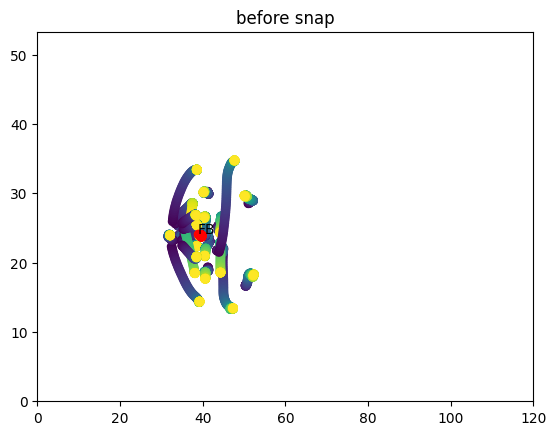

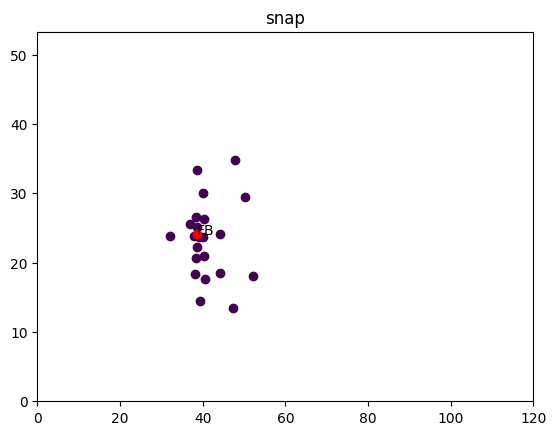

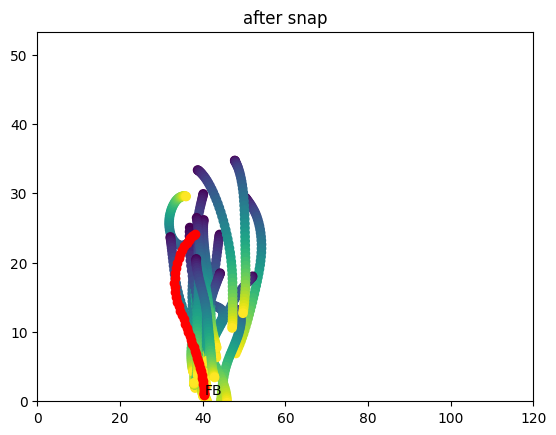

In [22]:
n = 0
frames = []
for frameType in [before_snap, snap, after_snap]:
    plt.xlim(0, 120)
    plt.ylim(0, 53.3)
    for i in range(len(frameType.displayName.unique())):
        player = frameType[frameType.displayName == players[i]].reset_index(drop=True)
        if player.displayName[0] == "football":
            plt.scatter(player.x, player.y, c="red")
            plt.text(list(player.x)[-1], list(player.y)[-1], "FB")
        else:
            plt.scatter(player.x, player.y, c=player.frameId)
            #plt.text(list(player.x)[-1], list(player.y)[-1], list(player.jerseyNumber)[-1])
    
    title = ""
    match n:
        case 0: 
            title = "before snap"
        case 1: 
            title = "snap"
        case 2: 
            title = "after snap"
    plt.title(title)
    
    plt.show()
    n+=1

In [50]:
after_snap = play1[play1.frameType == "AFTER_SNAP"]
print(len(player_with_ball(play1)))
player_with_ball(play1)

163


[('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('In air', None),
 ('Austin Blythe', 0.8608032897984429),
 ('Austin Blythe', 0.6385027984651092),
 ('Austin Blythe', 0.4820024536164792),
 ('Austin Blythe', 0.38250018310585443),
 ('Austin Blythe', 0.2929001144410595),
 ('Austin Blythe', 0.24050012969984497),
 ('Austin Blythe', 0.20880013732923897),
 ('Austin Blythe', 0.17690015258802488),
 ('Austin Blythe', 0.15970120544718233),
 ('Austin Blythe', 0.161800070190457),
 ('Austin Blythe', 0.1429009719877083),
 ('Austin Blythe', 0.1475999633789326),
 ('Austin Blythe', 0.1475999633789326),
 ('Austin Blythe', 0.1536999633789357),
 ('Austin Blythe', 0.15859996185305852),
 ('Austin Blythe', 0.1599999633789345),
 ('Austin Blythe', 0.1508009399443071),
 ('Austin Blythe', 0.153000979